In [1]:
# importing the necessary libraries and loading an image using OpenCV
# from functions import *
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import morphology
from sklearn.mixture import GaussianMixture

import os
from skimage.feature import local_binary_pattern
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import skew, kurtosis

In [2]:
#functions:
def load_images_from_folder_with_names(folder):
    image_data = []  # A list to store image data
    image_names = []  # A list to store image names without extensions

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            image_data.append(img)

            # Extract the image name without the extension and store it
            image_name = os.path.splitext(filename)[0]
            image_names.append(image_name)

    return image_data, image_names

def load_images_from_folder(folder):
    images = []
    image_names = []
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.tif')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                # Extract the image name without the extension
                image_name = os.path.splitext(filename)[0]
                image_names.append(image_name)
                images.append(img)

    return images, image_names

    return images
def load_images_from_folder_with_labels(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels



# Function to resize images
def resize_images(images, target_size):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        resized_images.append(resized_image)
    return resized_images

In [4]:

# Function to extract texture features
def extract_texture_features(im):
    im_gr = np.mean(im, axis=2).astype(np.uint8)
    glcm = graycomatrix(im_gr, distances=[3], angles=[0])
    features = []
    features.append(graycoprops(glcm, 'contrast')[0, 0])
    features.append(graycoprops(glcm, 'dissimilarity')[0, 0])
    features.append(graycoprops(glcm, 'homogeneity')[0, 0])
    features.append(graycoprops(glcm, 'energy')[0, 0])
    features.append(graycoprops(glcm, 'correlation')[0, 0])
    
    P = 4  # Number of bits in LBP
    imLBP = local_binary_pattern(im_gr, P, 2, method='uniform')
    histo_im, _ = np.histogram(imLBP, bins=np.arange(0, 2**P - 1))
    features.extend(histo_im)
    features.extend([np.mean(histo_im), np.std(histo_im)])
    return features

# Function to extract color features
def extract_color_features(segmented_image):
    features = []
    # Convert the segmented image to HSV color space
    hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2HSV)
    
    # Split the HSV image into its individual channels (H, S, V)
    h, s, v = cv2.split(hsv_image)
    
    # Calculate the mean, standard deviation, skew, and kurtosis of Hue (H), Saturation (S), and Value (V) channels
    mean_hue = np.mean(h)
    std_hue = np.std(h)
    skew_hue = skew(np.ravel(h))
    kurtosis_hue = kurtosis(np.ravel(h))
    
    mean_saturation = np.mean(s)
    std_saturation = np.std(s)
    skew_saturation = skew(np.ravel(s))
    kurtosis_saturation = kurtosis(np.ravel(s))
    
    mean_value = np.mean(v)
    std_value = np.std(v)
    skew_value = skew(np.ravel(v))
    kurtosis_value = kurtosis(np.ravel(v))
    
    # Convert the segmented image to LAB color space
    lab_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2Lab)
    
    # Split LAB image into L, A, and B channels
    l, a, b = cv2.split(lab_image)
    
    # Calculate the mean, standard deviation, skew, and kurtosis of LAB channels
    mean_l = np.mean(l)
    std_l = np.std(l)
    skew_l = skew(np.ravel(l))
    kurtosis_l = kurtosis(np.ravel(l))
    
    mean_a = np.mean(a)
    std_a = np.std(a)
    skew_a = skew(np.ravel(a))
    kurtosis_a = kurtosis(np.ravel(a))
    
    mean_b = np.mean(b)
    std_b = np.std(b)
    skew_b = skew(np.ravel(b))
    kurtosis_b = kurtosis(np.ravel(b))

    # Convert the segmented image to LAB color space
    xyz_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2XYZ)
    
    # Split LAB image into L, A, and B channels
    x, y, z = cv2.split(xyz_image)
    
    # Calculate the mean, standard deviation, skew, and kurtosis of LAB channels
    mean_x = np.mean(x)
    std_x = np.std(x)
    skew_x = skew(np.ravel(x))
    kurtosis_x = kurtosis(np.ravel(x))
    
    mean_y = np.mean(y)
    std_y = np.std(y)
    skew_y = skew(np.ravel(y))
    kurtosis_y = kurtosis(np.ravel(y))
    
    mean_z = np.mean(z)
    std_z = np.std(z)
    skew_z = skew(np.ravel(z))
    kurtosis_z = kurtosis(np.ravel(z))
    
    # Split the segmented image into its individual channels (B, G, R)
    b, g, r = cv2.split(segmented_image)
    
    # Calculate the mean, standard deviation, skew, and kurtosis of RGB channels
    mean_red = np.mean(r)
    std_red = np.std(r)
    skew_red = skew(np.ravel(r))
    kurtosis_red = kurtosis(np.ravel(r))
    
    mean_green = np.mean(g)
    std_green = np.std(g)
    skew_green = skew(np.ravel(g))
    kurtosis_green = kurtosis(np.ravel(g))
    
    mean_blue = np.mean(b)
    std_blue = np.std(b)
    skew_blue = skew(np.ravel(b))
    kurtosis_blue = kurtosis(np.ravel(b))

    # Black channel can be approximated as (R + G + B) / 3
    black_channel = (r + g + b) // 3
    mean_black = np.mean(black_channel)
    std_black = np.std(black_channel)
    skew_black = skew(np.ravel(black_channel))
    kurtosis_black = kurtosis(np.ravel(black_channel))

    # Append the color features to the list
    features.extend([
        mean_red, std_red, skew_red, kurtosis_red,
        mean_green, std_green, skew_green, kurtosis_green,
        mean_blue, std_blue, skew_blue, kurtosis_blue,
        mean_black, std_black, skew_black, kurtosis_black,
        mean_l, std_l, skew_l, kurtosis_l,
        mean_a, std_a, skew_a, kurtosis_a,
        mean_b, std_b, skew_b, kurtosis_b,
        mean_hue, std_hue, skew_hue, kurtosis_hue,
        mean_saturation, std_saturation, skew_saturation, kurtosis_saturation,
        mean_value, std_value, skew_value, kurtosis_value,
        mean_x, std_x, skew_x, kurtosis_x,
        mean_y, std_y, skew_y, kurtosis_y,
        mean_z, std_z, skew_z, kurtosis_z
    ])
    return features

  
def extract_shape_features(segmented_image):
    features = []
    # Convert the segmented image to grayscale
    gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
    
    # Find contours in the segmented image
    contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize lists to store shape features
    areas = []
    perimeters = []
    compactness = []
    eccentricity = []
    
    for contour in contours:
        # Calculate area
        area = cv2.contourArea(contour)
        areas.append(area)
        
        # Calculate perimeter
        perimeter = cv2.arcLength(contour, True)
        perimeters.append(perimeter)
        
        # Avoid division by zero when calculating compactness
        if perimeter == 0:
            comp = 0
        else:
            comp = (4 * 3.1415 * area) / (perimeter ** 2)
        compactness.append(comp)
        
        # Calculate eccentricity
        moments = cv2.moments(contour)
        major_axis_length = 2 * ((moments["mu20"] + moments["mu02"] +
                                 ((moments["mu20"] - moments["mu02"]) ** 2 +
                                  4 * (moments["mu11"] ** 2)) ** 0.5) / 2)
        minor_axis_length = 2 * ((moments["mu20"] + moments["mu02"] -
                                 ((moments["mu20"] - moments["mu02"]) ** 2 +
                                  4 * (moments["mu11"] ** 2)) ** 0.5) / 2)
        
        # Avoid division by zero when calculating eccentricity_value
        if major_axis_length == 0:
            eccentricity_value = 0
        else:
            eccentricity_value = (1.0 - (minor_axis_length / major_axis_length)) ** 0.5
        eccentricity.append(eccentricity_value)
    
    # Append the shape features to the list
    features.extend([
        len(contours), np.mean(areas), np.std(areas),
        np.mean(perimeters), np.std(perimeters),
        np.mean(compactness), np.std(compactness),
        np.mean(eccentricity), np.std(eccentricity)
    ])
    return features

def extract_features_all(segmented_image):
    
    color_features = extract_color_features(segmented_image)
    texture_features = extract_texture_features(segmented_image)
    shape_features = extract_shape_features(segmented_image)

    # Combine all feature lists into one feature list
    return color_features + texture_features + shape_features


In [5]:
# Load from training data
# Load images and assign labels
nevus_images, nevus_labels = load_images_from_folder_with_labels("data/train/nevus", 0)
others_images, others_labels = load_images_from_folder_with_labels("data/train/others", 1)
train_images = nevus_images + others_images
train_labels = nevus_labels + others_labels

In [8]:
def preprocess_image(image):
    for channel in range(image.shape[2]):
        mean_value = np.mean(image[:, :, channel])
        image[:, :, channel] = image[:, :, channel] - mean_value

        std_value = np.std(image[:, :, channel])
        image[:, :, channel] = image[:, :, channel] / (std_value + 1e-6)

    return image

# Define the target size for resizing
target_size = (256, 256)

# Lists to store segmented images and features
# segmented_images = []
train_features_list = []

for image in train_images:
    # Resize the image
    image_resized = cv2.resize(image, target_size)

    #preprocessed_image = preprocess_image(image_resized)

    
    # # Convert to LAB color space
    # image_lab = cv2.cvtColor(image_resized, cv2.COLOR_BGR2Lab)
    
    # # Extract the L channel (luminance) for contrast enhancement
    # luminance_channel = image_lab[:, :, 0]

    # # Apply Adaptive Histogram Equalization
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # clahe_image = clahe.apply(luminance_channel)

    # # Noise Reduction with Gaussian Filter
    # blurred_image = cv2.GaussianBlur(clahe_image, (5, 5), 0)

    # # Normalize the combined image to the range [0, 255]
    # normalized_image = cv2.normalize(blurred_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    # normalized_image_3ch = cv2.merge((normalized_image, normalized_image, normalized_image))

    # Extract features using the extract_features function
    features = extract_features_all(image_resized)
    train_features_list.append(features)


In [6]:
# Load from val data
# Load images and assign labels
nevus_images, nevus_labels = load_images_from_folder_with_labels("data/val/nevus", 0)
others_images, others_labels = load_images_from_folder_with_labels("data/val/others", 1)
val_images = nevus_images + others_images
val_labels = nevus_labels + others_labels

In [9]:
# Define the target size for resizing
target_size = (256, 256)

# Lists to store segmented images and features
# segmented_images = []
val_features_list = []

for image in val_images:
    # Resize the image
    image_resized = cv2.resize(image, target_size)
    #preprocessed_image = preprocess_image(image_resized)
    
    # # Convert to LAB color space
    # image_lab = cv2.cvtColor(image_resized, cv2.COLOR_BGR2Lab)
    
    # # Extract the L channel (luminance) for contrast enhancement
    # luminance_channel = image_lab[:, :, 0]

    # # Apply Histogram Equalization
    # equalized_image = cv2.equalizeHist(luminance_channel)

    # # Apply Adaptive Histogram Equalization
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # clahe_image = clahe.apply(luminance_channel)

    # # Noise Reduction with Gaussian Filter
    # blurred_image = cv2.GaussianBlur(clahe_image, (5, 5), 0)

    # # Normalize the combined image to the range [0, 255]
    # normalized_image = cv2.normalize(blurred_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    # normalized_image_3ch = cv2.merge((normalized_image, normalized_image, normalized_image))

    
    # Extract features using the extract_features function
    features = extract_features_all(image_resized)
    val_features_list.append(features)



# Resource
- Melanoma skin cancer detection:
    - https://ieeexplore.ieee.org/abstract/document/9231544

# Machine Learning

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [11]:
# # Convert the feature lists to NumPy arrays
X_train = np.array(train_features_list)  # Feature vectors
y_train = np.array(train_labels)  # Labels

# # 
X_val = np.array(val_features_list)
y_val = np.array(val_labels)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

Confusion Matrix validation:
[[1471  460]
 [ 407 1458]]
Validation ROC AUC: 0.8508286556438411
Confusion Matrix train:
[[5967 1758]
 [1541 5929]]
Training ROC AUC: 0.8546366869852658


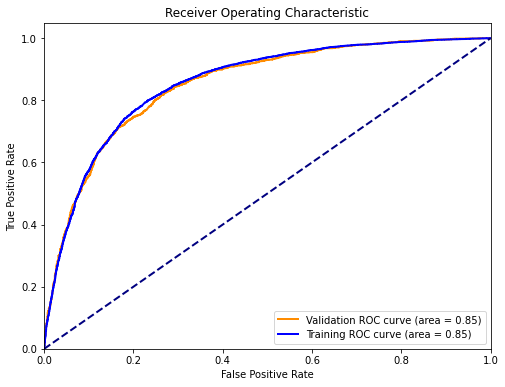

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1931
           1       0.76      0.78      0.77      1865

    accuracy                           0.77      3796
   macro avg       0.77      0.77      0.77      3796
weighted avg       0.77      0.77      0.77      3796

Training Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      7725
           1       0.77      0.79      0.78      7470

    accuracy                           0.78     15195
   macro avg       0.78      0.78      0.78     15195
weighted avg       0.78      0.78      0.78     15195



In [ ]:
# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', probability=True)

# Train the SVM classifier on the training data after PCA
svm_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
y_pred_val = svm_classifier.predict(X_val)

# Get predicted probabilities for ROC curve for both validation and training sets
y_pred_train = svm_classifier.predict(X_train)

# Get predicted probabilities for ROC curve for both validation and training sets
y_pred_prob_val = svm_classifier.predict_proba(X_val)
y_pred_prob_train = svm_classifier.predict_proba(X_train)

# Compute confusion matrix for both validation and training sets
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)


# Compute ROC curve for both validation and training sets
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val[:, 1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train[:, 1])

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_train = auc(fpr_train, tpr_train)

# Print confusion matrix and ROC AUC for both validation and training sets
print("Confusion Matrix validation:")
print(conf_matrix_val)
print(f"Validation ROC AUC: {roc_auc_val}")

print("Confusion Matrix train:")
print(conf_matrix_train)
print(f"Training ROC AUC: {roc_auc_train}")


# Plot ROC curves for both validation and training sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Generate classification report for the validation set
class_report_val = classification_report(y_val, y_pred_val)
print("Validation Classification Report:")
print(class_report_val)

# Generate classification report for the training set
class_report_train = classification_report(y_train, y_pred_train)
print("Training Classification Report:")
print(class_report_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
import pandas as pd

# Create and train additional classifiers
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0),
    "SVM": svm_classifier,
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    
}

# Create a dictionary to store evaluation metrics for all models
evaluation_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'Confusion Matrix': [],
    'ROC AUC': []
}

# Loop through each classifier, fit the model, and evaluate its performance
for model_name, classifier in models.items():
    # Fit the model
    classifier.fit(X_train, y_train)
    
    # Predict the labels for the validation set
    y_pred_val = classifier.predict(X_val)
    
    # Get predicted probabilities for ROC curve
    y_prob_val = classifier.predict_proba(X_val)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)
    
    # Get confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred_val)
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_val, y_prob_val)
    
    # Append results to the dictionary
    evaluation_results['Model'].append(model_name)
    evaluation_results['Accuracy'].append(accuracy)
    evaluation_results['Precision'].append(precision)
    evaluation_results['Recall'].append(recall)
    evaluation_results['F1-Score'].append(f1)
    evaluation_results['Confusion Matrix'].append(conf_matrix)
    evaluation_results['ROC AUC'].append(roc_auc)

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(evaluation_results)

# Sort the results by a specific metric, e.g., ROC AUC
sorted_results = results_df.sort_values(by='ROC AUC', ascending=False)

# Display the sorted results
print(sorted_results)


                 Model  Accuracy  Precision    Recall  F1-Score  \
4        Random Forest  0.822445   0.823817  0.812332  0.818035   
0    Gradient Boosting  0.797682   0.789446  0.802145  0.795745   
2       Neural Network  0.793203   0.795728  0.779088  0.787321   
1  K-Nearest Neighbors  0.798999   0.780264  0.822520  0.800835   
5  Logistic Regression  0.770285   0.760904  0.776408  0.768577   
3                  SVM  0.771602   0.760167  0.781769  0.770817   

             Confusion Matrix   ROC AUC  
4  [[1607, 324], [350, 1515]]  0.899840  
0  [[1532, 399], [369, 1496]]  0.876546  
2  [[1558, 373], [412, 1453]]  0.873273  
1  [[1499, 432], [331, 1534]]  0.865269  
5  [[1476, 455], [417, 1448]]  0.851976  
3  [[1471, 460], [407, 1458]]  0.850827  


Confusion Matrix validation (Random Forest):
[[1607  324]
 [ 350 1515]]
Validation ROC AUC (Random Forest): 0.90
Confusion Matrix train (Random Forest):
[[7725    0]
 [   0 7470]]
Training ROC AUC (Random Forest): 1.00


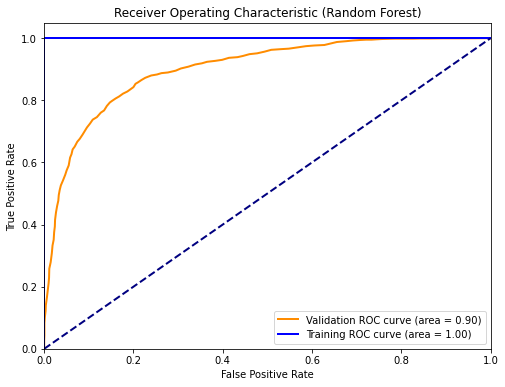

Validation Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1931
           1       0.82      0.81      0.82      1865

    accuracy                           0.82      3796
   macro avg       0.82      0.82      0.82      3796
weighted avg       0.82      0.82      0.82      3796

Training Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7725
           1       1.00      1.00      1.00      7470

    accuracy                           1.00     15195
   macro avg       1.00      1.00      1.00     15195
weighted avg       1.00      1.00      1.00     15195



In [12]:
# Import the Random Forest Classifier #overfitting
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the Random Forest classifier on the training data after PCA
rf_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
y_pred_val_rf = rf_classifier.predict(X_val)
y_pred_train_rf = rf_classifier.predict(X_train)

# Get predicted probabilities for ROC curve for both validation and training sets
y_pred_prob_val_rf = rf_classifier.predict_proba(X_val)
y_pred_prob_train_rf = rf_classifier.predict_proba(X_train)

# Compute confusion matrix for both validation and training sets
conf_matrix_val_rf = confusion_matrix(y_val, y_pred_val_rf)
conf_matrix_train_rf = confusion_matrix(y_train, y_pred_train_rf)

# Compute ROC curve for both validation and training sets
fpr_val_rf, tpr_val_rf, thresholds_val_rf = roc_curve(y_val, y_pred_prob_val_rf[:, 1])
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train, y_pred_prob_train_rf[:, 1])

roc_auc_val_rf = auc(fpr_val_rf, tpr_val_rf)
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

# Print confusion matrix and ROC AUC for both validation and training sets
print("Confusion Matrix validation (Random Forest):")
print(conf_matrix_val_rf)
print(f"Validation ROC AUC (Random Forest): {roc_auc_val_rf:.2f}")

print("Confusion Matrix train (Random Forest):")
print(conf_matrix_train_rf)
print(f"Training ROC AUC (Random Forest): {roc_auc_train_rf:.2f}")

# Plot ROC curves for both validation and training sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_val_rf, tpr_val_rf, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val_rf:.2f})')
plt.plot(fpr_train_rf, tpr_train_rf, color='blue', lw=2, label=f'Training ROC curve (area = {roc_auc_train_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Generate classification report for the validation set (Random Forest)
class_report_val_rf = classification_report(y_val, y_pred_val_rf)
print("Validation Classification Report (Random Forest):")
print(class_report_val_rf)

# Generate classification report for the training set (Random Forest)
class_report_train_rf = classification_report(y_train, y_pred_train_rf)
print("Training Classification Report (Random Forest):")
print(class_report_train_rf)


Confusion Matrix validation:
[[1558  373]
 [ 412 1453]]
Validation ROC AUC: 0.8733
Confusion Matrix train:
[[5967 1758]
 [1541 5929]]
Training ROC AUC: 0.9985


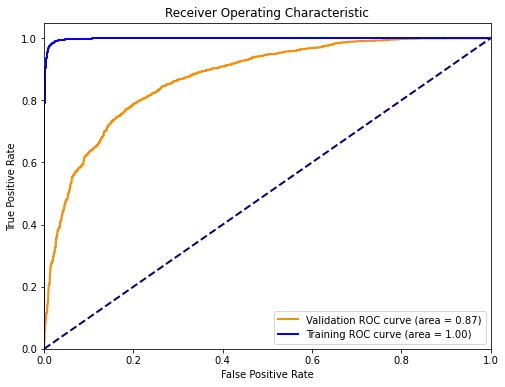

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1931
           1       0.80      0.78      0.79      1865

    accuracy                           0.79      3796
   macro avg       0.79      0.79      0.79      3796
weighted avg       0.79      0.79      0.79      3796

Training Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      7725
           1       0.77      0.79      0.78      7470

    accuracy                           0.78     15195
   macro avg       0.78      0.78      0.78     15195
weighted avg       0.78      0.78      0.78     15195



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier

# Create a Neural Network classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)

# Train the Neural Network classifier on the training data after PCA
nn_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
y_pred_val = nn_classifier.predict(X_val)

# Get predicted probabilities for ROC curve for both validation and training sets
y_pred_prob_val = nn_classifier.predict_proba(X_val)
y_pred_prob_train = nn_classifier.predict_proba(X_train)

# Compute confusion matrix for both validation and training sets
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Compute ROC curve for both validation and training sets
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val[:, 1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train[:, 1])

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_train = auc(fpr_train, tpr_train)

# Print confusion matrix and ROC AUC for both validation and training sets
print("Confusion Matrix validation:")
print(conf_matrix_val)
print(f"Validation ROC AUC: {roc_auc_val:.4f}")

print("Confusion Matrix train:")
print(conf_matrix_train)
print(f"Training ROC AUC: {roc_auc_train:.4f}")

# Plot ROC curves for both validation and training sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Generate classification report for the validation set
class_report_val = classification_report(y_val, y_pred_val)
print("Validation Classification Report:")
print(class_report_val)

# Generate classification report for the training set
class_report_train = classification_report(y_train, y_pred_train)
print("Training Classification Report:")
print(class_report_train)


Confusion Matrix validation:
[[1532  399]
 [ 369 1496]]
Validation ROC AUC: 0.8765
Confusion Matrix train:
[[6237 1488]
 [1317 6153]]
Training ROC AUC: 0.8993


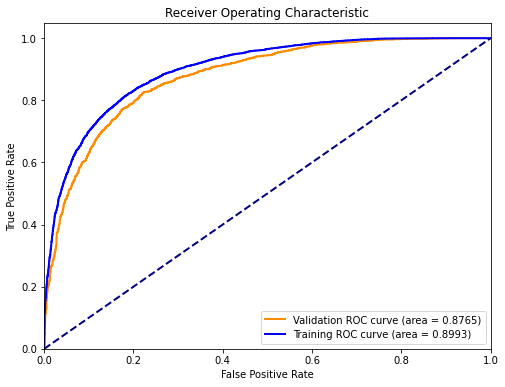

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1931
           1       0.79      0.80      0.80      1865

    accuracy                           0.80      3796
   macro avg       0.80      0.80      0.80      3796
weighted avg       0.80      0.80      0.80      3796

Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7725
           1       0.81      0.82      0.81      7470

    accuracy                           0.82     15195
   macro avg       0.82      0.82      0.82     15195
weighted avg       0.82      0.82      0.82     15195



In [12]:
# Create a Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)

# Train the Gradient Boosting classifier on the training data after PCA
gb_classifier.fit(X_train, y_train)

# Predict the labels for the validation set
y_pred_val = gb_classifier.predict(X_val)

# Get predicted probabilities for ROC curve for both validation and training sets
y_pred_train = gb_classifier.predict(X_train)

# Get predicted probabilities for ROC curve for both validation and training sets
y_pred_prob_val = gb_classifier.predict_proba(X_val)
y_pred_prob_train = gb_classifier.predict_proba(X_train)

# Compute confusion matrix for both validation and training sets
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Compute ROC curve for both validation and training sets
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val[:, 1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train[:, 1])

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_train = auc(fpr_train, tpr_train)

# Print confusion matrix and ROC AUC for both validation and training sets
print("Confusion Matrix validation:")
print(conf_matrix_val)
print(f"Validation ROC AUC: {roc_auc_val:.4f}")

print("Confusion Matrix train:")
print(conf_matrix_train)
print(f"Training ROC AUC: {roc_auc_train:.4f}")

# Plot ROC curves for both validation and training sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.4f})')
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (area = {roc_auc_train:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Generate classification report for the validation set
class_report_val = classification_report(y_val, y_pred_val)
print("Validation Classification Report:")
print(class_report_val)

# Generate classification report for the training set
class_report_train = classification_report(y_train, y_pred_train)
print("Training Classification Report:")
print(class_report_train)


In [15]:

# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA on the scaled training features
pca.fit(X_train)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Choose the number of components that exceed a certain threshold (e.g., 95%)
n_components = np.argmax(cumulative_explained_variance >= 0.99) + 1

# Now, initialize PCA with the selected number of components
pca = PCA(n_components=n_components)

# Fit PCA on the scaled training features with the selected number of components
X_train_pca = pca.fit_transform(X_train)

# Apply the same PCA transformation to the validation set
X_val_pca = pca.transform(X_val)

# # Convert the list of features to a DataFrame
df = pd.DataFrame(X_train)
print("N_train_features  :", len(df.columns))
print("n_components :", n_components)


N_train_features  : 82
n_components : 33


Confusion Matrix validation:
[[1492  439]
 [ 363 1502]]
Validation ROC AUC: 0.8660
Confusion Matrix train:
[[6132 1593]
 [1314 6156]]
Training ROC AUC: 0.8906


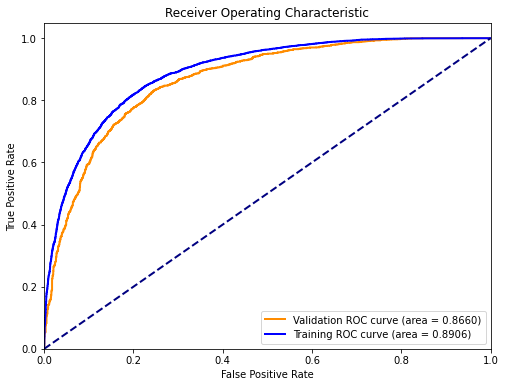

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1931
           1       0.77      0.81      0.79      1865

    accuracy                           0.79      3796
   macro avg       0.79      0.79      0.79      3796
weighted avg       0.79      0.79      0.79      3796

Training Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      7725
           1       0.79      0.82      0.81      7470

    accuracy                           0.81     15195
   macro avg       0.81      0.81      0.81     15195
weighted avg       0.81      0.81      0.81     15195



In [16]:
# Create a Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)

# Train the Gradient Boosting classifier on the training data after PCA
gb_classifier.fit(X_train_pca, y_train)

# Predict the labels for the validation set
y_pred_val = gb_classifier.predict(X_val_pca)

# Get predicted probabilities for ROC curve for both validation and training sets
y_pred_train = gb_classifier.predict(X_train_pca)

# Get predicted probabilities for ROC curve for both validation and training sets
y_pred_prob_val = gb_classifier.predict_proba(X_val_pca)
y_pred_prob_train = gb_classifier.predict_proba(X_train_pca)

# Compute confusion matrix for both validation and training sets
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Compute ROC curve for both validation and training sets
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val[:, 1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train[:, 1])

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_train = auc(fpr_train, tpr_train)

# Print confusion matrix and ROC AUC for both validation and training sets
print("Confusion Matrix validation:")
print(conf_matrix_val)
print(f"Validation ROC AUC: {roc_auc_val:.4f}")

print("Confusion Matrix train:")
print(conf_matrix_train)
print(f"Training ROC AUC: {roc_auc_train:.4f}")

# Plot ROC curves for both validation and training sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.4f})')
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (area = {roc_auc_train:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Generate classification report for the validation set
class_report_val = classification_report(y_val, y_pred_val)
print("Validation Classification Report:")
print(class_report_val)

# Generate classification report for the training set
class_report_train = classification_report(y_train, y_pred_train)
print("Training Classification Report:")
print(class_report_train)


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create the classifier
gb_classifier = GradientBoostingClassifier(random_state=0)

# Create a grid search object with the classifier and parameter grid
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

Confusion Matrix validation:
[[1507  424]
 [ 386 1479]]
Validation ROC AUC: 0.8644
Confusion Matrix train:
[[6167 1558]
 [1430 6040]]
Training ROC AUC: 0.8876


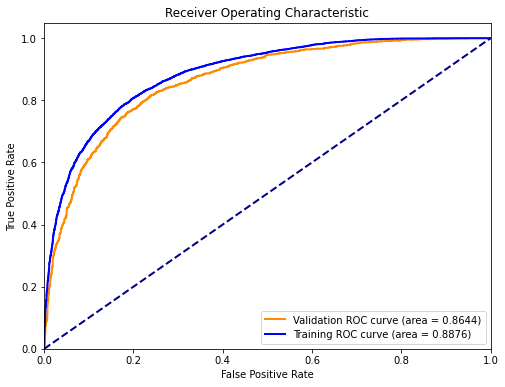

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1931
           1       0.78      0.79      0.79      1865

    accuracy                           0.79      3796
   macro avg       0.79      0.79      0.79      3796
weighted avg       0.79      0.79      0.79      3796

Training Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      7725
           1       0.79      0.81      0.80      7470

    accuracy                           0.80     15195
   macro avg       0.80      0.80      0.80     15195
weighted avg       0.80      0.80      0.80     15195



In [18]:
from sklearn.model_selection import cross_val_predict, cross_val_score

best_gb_classifier = GradientBoostingClassifier(n_estimators=best_params['n_estimators'],
                                                learning_rate=best_params['learning_rate'],
                                                max_depth=best_params['max_depth'],
                                                random_state=0)

# Perform cross-validation to get predictions and scores
y_pred_val = cross_val_predict(best_gb_classifier, X_val, y_val, cv=5, method='predict')
y_pred_prob_val = cross_val_predict(best_gb_classifier, X_val, y_val, cv=5, method='predict_proba')
y_pred_train = cross_val_predict(best_gb_classifier, X_train, y_train, cv=5, method='predict')
y_pred_prob_train = cross_val_predict(best_gb_classifier, X_train, y_train, cv=5, method='predict_proba')

# Compute ROC curves for both validation and training sets
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_prob_val[:, 1])
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_prob_train[:, 1])

roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_train = auc(fpr_train, tpr_train)

# Print confusion matrix and ROC AUC for both validation and training sets
print("Confusion Matrix validation:")
print(confusion_matrix(y_val, y_pred_val))
print(f"Validation ROC AUC: {roc_auc_val:.4f}")

print("Confusion Matrix train:")
print(confusion_matrix(y_train, y_pred_train))
print(f"Training ROC AUC: {roc_auc_train:.4f}")

# Plot ROC curves for both validation and training sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.4f})')
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Training ROC curve (area = {roc_auc_train:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Generate classification report for the validation set
class_report_val = classification_report(y_val, y_pred_val)
print("Validation Classification Report:")
print(class_report_val)

# Generate classification report for the training set
class_report_train = classification_report(y_train, y_pred_train)
print("Training Classification Report:")
print(class_report_train)

In [7]:

def load_images_from_folder_names(folder):
    images = []
    image_names = []
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff', '.tif')):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                # Extract the image name without the extension
                image_name = os.path.splitext(filename)[0]
                image_names.append(image_name)
                images.append(img)

    return images, image_names

# Define the folder path for test images
# test_folder = 'data/testX'
# # Load test images
# test_images, image_names = load_images_from_folder_names(test_folder)

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define the path to the test data directory
# test_data_dir = 'data/testX'

# # Initialize an image data generator for test data
# test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Normalize pixel values to [0, 1]

# # Create a data generator for test data
# test_generator = test_datagen.flow_from_directory(
#     test_data_dir,
#     target_size=(256, 256),  # Set the target image size
#     batch_size=32,  # Set the batch size
#     class_mode='binary',  # Set class_mode to 'binary' for binary classification
#     shuffle=False  # Do not shuffle test data
# )
# # Get the total number of test samples
# num_test_samples = test_generator.samples

import os
import cv2
import pickle

# Function to save a tuple of images and image names to a pickle file
def save_data_to_pickle(data, pickle_file):
    with open(pickle_file, 'wb') as f:
        pickle.dump(data, f)

# Function to load a tuple of images and image names from a pickle file
def load_data_from_pickle(pickle_file):
    with open(pickle_file, 'rb') as f:
        data = pickle.load(f)
    return data

# Define the folder path for test images
test_folder = 'data/testX'

# Check if a pickle file for test images exists
test_pickle_file = 'test_images.pkl'

if os.path.exists(test_pickle_file):
    # If the pickle file exists, load images and image names as a tuple
    test_data = load_data_from_pickle(test_pickle_file)
    test_images, image_names = test_data
else:
    # If the pickle file doesn't exist, load images and image names from the folder
    test_images, image_names = load_images_from_folder_names(test_folder)

    # Save the loaded images and image names as a tuple to a pickle file for future use
    save_data_to_pickle((test_images, image_names), test_pickle_file)




In [13]:
# Define the target size for resizing
target_size = (256, 256)

test_features_list = []
for image in test_images:

    # Resize the image
    image_resized = cv2.resize(image, target_size)
    
    # Extract features using the extract_features function
    features = extract_features_all(image_resized)
    test_features_list.append(features)

In [14]:
# # Convert the feature lists to NumPy arrays
X_test = np.array(test_features_list)  # Feature vectors

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Use the best gradient boosting classifier to predict the labels for the test features
y_pred_test = gb_classifier.predict(X_test)

In [15]:
import pandas as pd

# Create a DataFrame with image names and predicted labels
test_results = pd.DataFrame({
    "Image Name": image_names,
    "Predicted Label": y_pred_test
})

# Save the DataFrame to an Excel file
test_results.to_excel("test_results.xlsx", index=False)


## Create a DataFrame with only the predicted labels
predicted_labels_df = pd.DataFrame({"Predicted Label": y_pred_test})

# Save the DataFrame to an Excel file
predicted_labels_df.to_excel("predicted_labels.xlsx", index=False)